How is the Body-Mass-Index related to Diabetes development in the human body?
Shown by different Regression methods

1. Linear Regression with Ordinary-Least-Squares

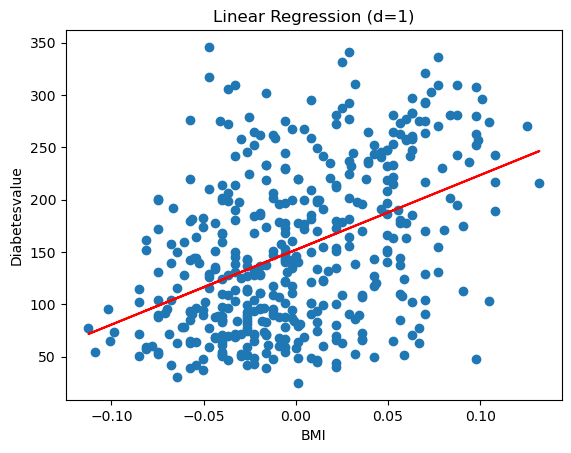

In [9]:
from matplotlib.pylab import solve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:,3]
y = diabetes.target
def phi(X, d):
    N = X.shape[0]
    Phi = np.ones((N, d + 1))
    for i in range(1, d + 1):
        Phi[:, i] = X ** i
    return Phi
def linear_regression(X, y, d):
    X = phi(X, d)
    w_ml = solve(X.T @ X, X.T @ y)
    return w_ml

def plot_regression(X, y, y_pred, title):
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('BMI')
    plt.ylabel('Diabetesvalue')
    plt.title(title)
    plt.show()
plot_regression(X, y, linear_regression(X, y, 1) @ phi(X, 1).T, 'Linear Regression (d=1)')
    


  

Summary: This simple model shows us that there is indeed a trend of increasing Diabetesvalue with BMI, but this simplifies the correlation process too much and there needs to be other data to make a feasible conclusion. With this we can use feature engineering to further strengthen our model and make it more substantiated.

1.1 Feature Engineering 

- Let us start with expanding our model by tweaking our hyperparameter d first

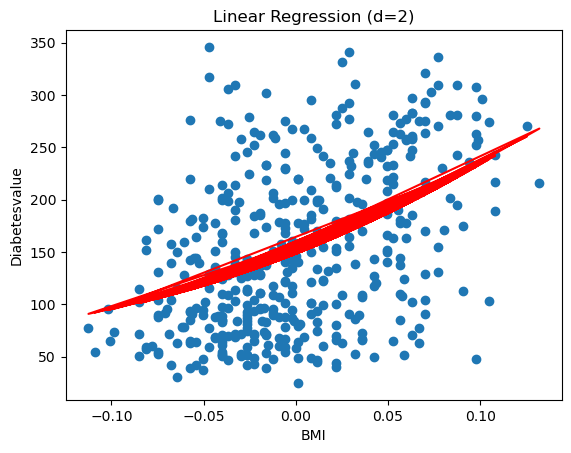

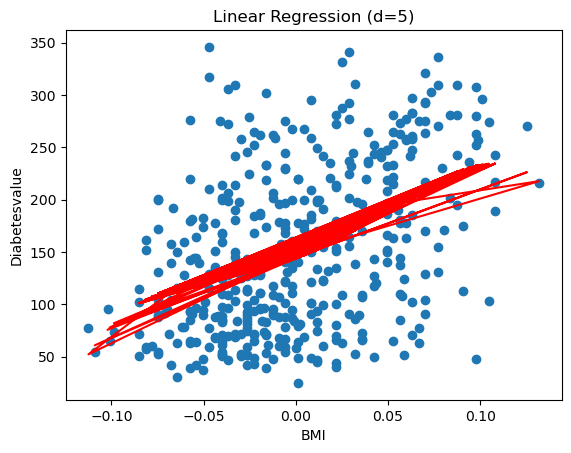

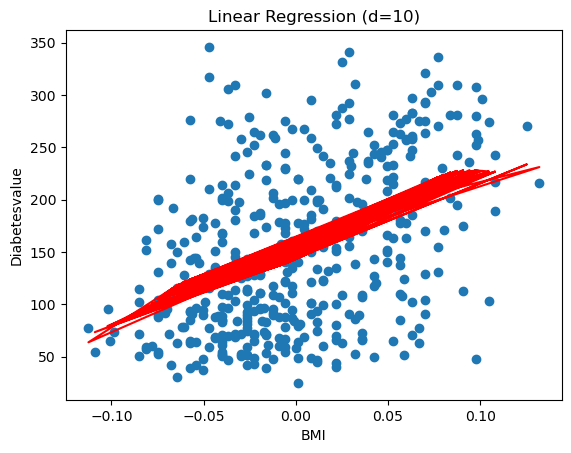

In [15]:
plot_regression(X, y, linear_regression(X, y, 2) @ phi(X, 2).T, 'Linear Regression (d=2)')
plot_regression(X, y, linear_regression(X, y, 5) @ phi(X, 5).T, 'Linear Regression (d=5)')
plot_regression(X, y, linear_regression(X, y, 10) @ phi(X, 10).T, 'Linear Regression (d=10)')

Suddenly we can note that increasing our hyperparameter basically changes nothing in our model, but why is that?
Let's start with some data:

In our given dataset the data in x is normalized and thus displayed in a small interval [-0.1,0.1], this gives us the small polynomial changes in our feature space as for example if x=0.1, then d = 0.1^d, which adds only little changes to our model.

But something else changes drastically.

- In our function linear_regression we use this formula:
w_ml = solve(X.T @ X, X.T @ y), which is the function (X.T @ X)^-1 @ X.T @ y
-> this is where things derail, as the inverse of a matrix-multiplication of small numbers is a large number and is basically impossible to invert

That is why when the weights get very big, the w_ml (ordinary least squares) method implodes.
So how do we solve this issue?

Let's introduce a punishment method:

Ridge Regression




2. Ridge Regression